# **McDonalds Market Segmentation**

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Reading the dataset

In [2]:
df = pd.read_csv('mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

No null values are present in the dataset.

In [5]:
df.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


The dataset lies from the age-limit of 18 to 71. Average age is 45. It can be seen that most of people visit Mcdonalds once a month.

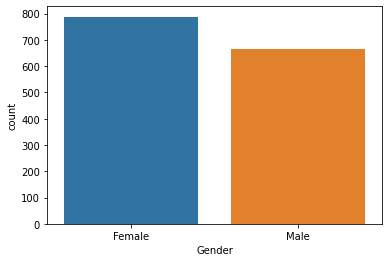

In [6]:
sns.countplot(data=df,x='Gender')

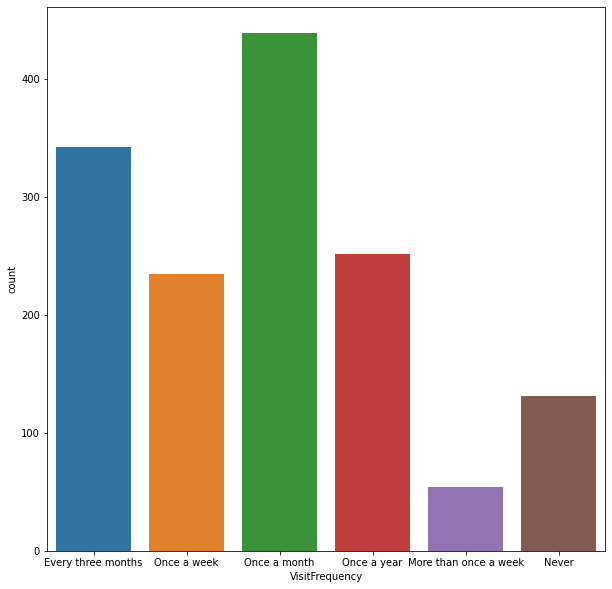

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='VisitFrequency')
plt.show()

<Figure size 864x864 with 0 Axes>

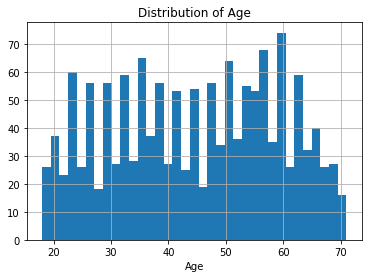

In [8]:
plt.figure(figsize=(12,12))
df.hist('Age', bins=35)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

We can see that the data is present for age categories between 20 to 70, and highest count is between 50 to 60.

In [9]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

# Handling Categorical Variables

In [10]:
categorical = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting','VisitFrequency', 'Gender']

In [11]:
for i in categorical:
  df[i] = LabelEncoder().fit_transform(df[i])
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1


In [12]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955,2.637990,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178,1.756057,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000,5.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   int64 
 1   convenient      1453 non-null   int64 
 2   spicy           1453 non-null   int64 
 3   fattening       1453 non-null   int64 
 4   greasy          1453 non-null   int64 
 5   fast            1453 non-null   int64 
 6   cheap           1453 non-null   int64 
 7   tasty           1453 non-null   int64 
 8   expensive       1453 non-null   int64 
 9   healthy         1453 non-null   int64 
 10  disgusting      1453 non-null   int64 
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   int64 
 14  Gender          1453 non-null   int64 
dtypes: int64(14), object(1)
memory usage: 170.4+ KB


In [14]:
df.Like.unique()

array(['-3', '2', '1', '4', 'I love it!+5', 'I hate it!-5', '-2', '3',
       '0', '-4', '-1'], dtype=object)

In [15]:
likes = []
for i in df.Like.values:
  if i ==  'I love it!+5':
    i = '+5'
    likes.append(i)
  elif i =='I hate it!-5':
    i = '-5'
    likes.append(i)
  else:
    likes.append(i)
    pass
df['Like'] = likes

In [16]:
df.Like = df.Like.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int64
 1   convenient      1453 non-null   int64
 2   spicy           1453 non-null   int64
 3   fattening       1453 non-null   int64
 4   greasy          1453 non-null   int64
 5   fast            1453 non-null   int64
 6   cheap           1453 non-null   int64
 7   tasty           1453 non-null   int64
 8   expensive       1453 non-null   int64
 9   healthy         1453 non-null   int64
 10  disgusting      1453 non-null   int64
 11  Like            1453 non-null   int64
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int64
 14  Gender          1453 non-null   int64
dtypes: int64(15)
memory usage: 170.4 KB


In [17]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int64
 1   convenient      1453 non-null   int64
 2   spicy           1453 non-null   int64
 3   fattening       1453 non-null   int64
 4   greasy          1453 non-null   int64
 5   fast            1453 non-null   int64
 6   cheap           1453 non-null   int64
 7   tasty           1453 non-null   int64
 8   expensive       1453 non-null   int64
 9   healthy         1453 non-null   int64
 10  disgusting      1453 non-null   int64
 11  Like            1453 non-null   int64
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int64
 14  Gender          1453 non-null   int64
dtypes: int64(15)
memory usage: 170.4 KB


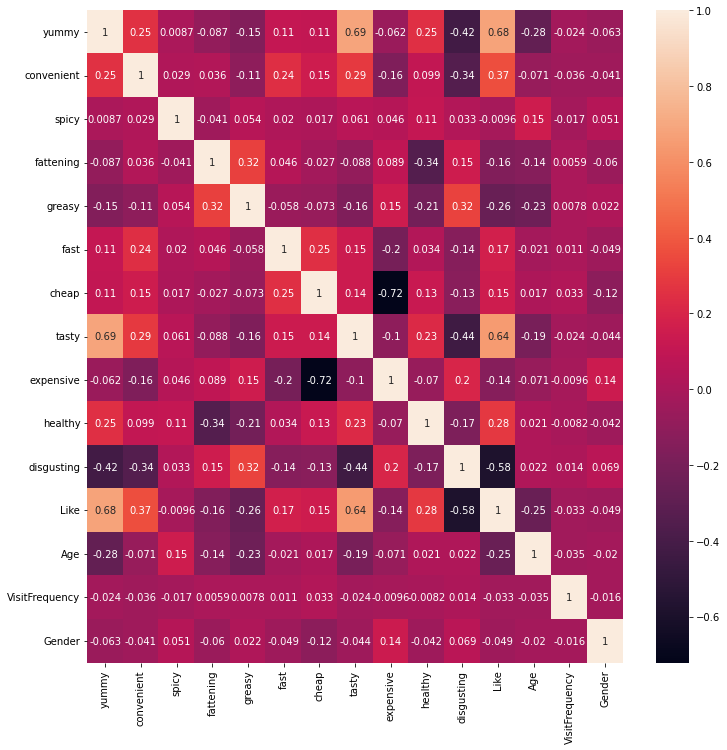

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

We can see that 'expensive' and 'cheap' variable share strong inverse relatioship. 
'yummy', 'tasty' and 'like' variable share strong positive relatioship.

# Standardization

In [20]:
df_standardize = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)
df_standardize.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,-1.111479,0.318735,-0.321349,0.391375,-1.054476,0.332951,0.818605,-1.345528,1.339489,-0.498279,-0.566488,-1.212225,1.153258,-1.502741,-0.918645
1,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,1.339489,-0.498279,-0.566488,0.392515,0.449839,-1.502741,-0.918645
2,-1.111479,0.318735,3.111884,0.391375,0.948339,0.332951,-1.221590,0.743203,1.339489,2.006908,-0.566488,0.071567,1.223600,-1.502741,-0.918645
3,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,-0.746553,-0.498279,1.765261,1.034411,1.715993,0.775874,-0.918645
4,-1.111479,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,-1.345528,-0.746553,2.006908,-0.566488,0.392515,0.309156,0.206220,1.088560


# Clustering Algorithm

In [42]:
cluster_testing = [KMeans(n_clusters=i, n_init=10) for i in range(1, 11)]
inertias = [cluster_testing[i].fit(df_standardize).inertia_ for i in range(len(cluster_testing))]

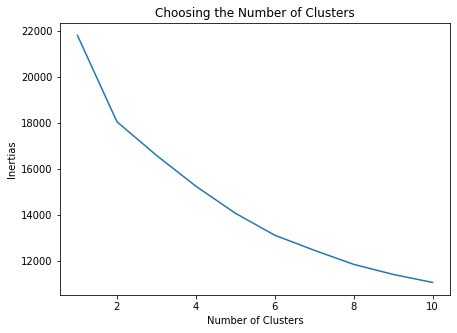

In [43]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertias")
plt.title("Choosing the Number of Clusters")
plt.show()

In [44]:
kmeans = KMeans(n_clusters=5, n_init=25)
kmeans.fit(df_standardize)
clusters = kmeans.predict(df_standardize)
clusters

array([1, 3, 3, ..., 3, 0, 1], dtype=int32)

# Principal Component Analysis

In [45]:
pca = PCA(n_components=2)
reduced_data = pd.DataFrame(pca.fit_transform(df_standardize), columns=['PC1', 'PC2'])
reduced_data

,PC1,PC2
0,1.280047,-1.140226
1,-0.780907,0.716358
2,0.089829,0.777537
3,-0.444036,-0.943029
4,0.071118,-1.261429
...,...,...
1448,3.930286,1.344318
1449,-1.699788,0.093217
1450,-0.904211,1.467242
1451,-2.808550,-0.512594


In [46]:
reduced_data['cluster'] = clusters
reduced_data

,PC1,PC2,cluster
0,1.280047,-1.140226,1
1,-0.780907,0.716358,3
2,0.089829,0.777537,3
3,-0.444036,-0.943029,2
4,0.071118,-1.261429,1
...,...,...,...
1448,3.930286,1.344318,1
1449,-1.699788,0.093217,2
1450,-0.904211,1.467242,3
1451,-2.808550,-0.512594,0


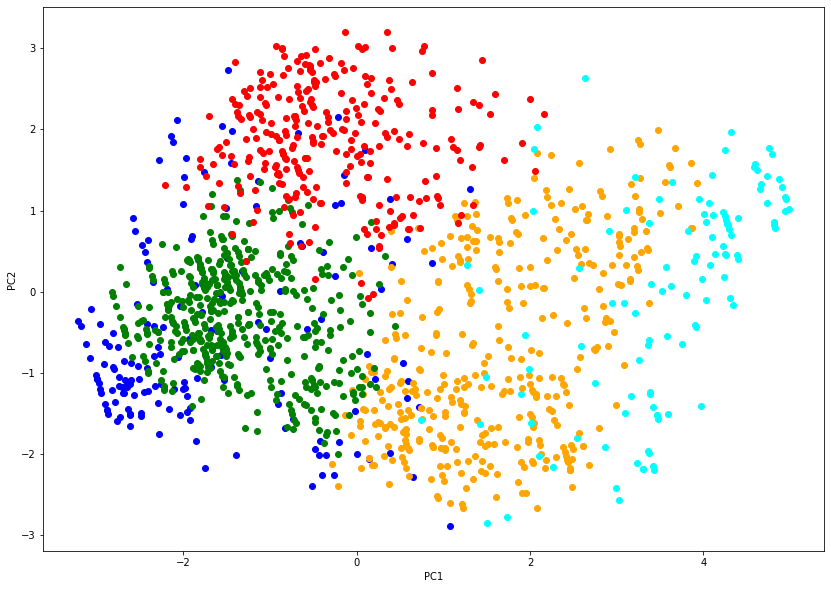

In [47]:
plt.figure(figsize=(14, 10))
plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC2'], color='orange')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC2'], color='green')
plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC2'], color='cyan')
#plt.scatter(reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC2'], color='magenta')
#plt.scatter(reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC2'], color='brown')
#plt.scatter(reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC2'], color='purple')
#plt.scatter(reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC2'], color='yellow')
#plt.scatter(reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC2'], color='pink')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

PCA is used for visualization purpose. Many points are overlapping, since we have consolidated many variables to just two(for visualization).

# Understanding Clusters

In [48]:
df['cluster'] = clusters
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0,3
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0,2
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1,1


In [49]:
sum_df = df.groupby(['cluster'], as_index=False).sum()
sum_df.drop(['Like','Age','VisitFrequency','Gender'],axis=1,inplace=True)
sum_df.head()

,cluster,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,125,159,21,0,12,156,116,140,34,105,5
1,1,12,393,34,385,265,359,229,46,138,21,194
2,2,418,484,37,490,223,474,449,475,1,103,23
3,3,246,283,37,287,181,248,37,267,276,54,38
4,4,2,0,7,98,84,71,39,8,71,6,93


In [50]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df.drop(['cluster', 'yummy', 'convenient', 'spicy', 'fattening', 'greasy','fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting','VisitFrequency','Gender'],axis=1,inplace=True)
avg_df.head()

,Like,Age
0,2.796407,50.227545
1,-1.949109,49.206107
2,2.504082,41.230612
3,2.196552,38.996552
4,-3.858407,49.318584


In [51]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,0.777013,44.604955,2.637990,0.457674,1.854783
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.116842,14.221178,1.756057,0.498377,1.104823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,33.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,45.000000,3.000000,0.000000,2.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,57.000000,4.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,5.000000,1.000000,4.000000


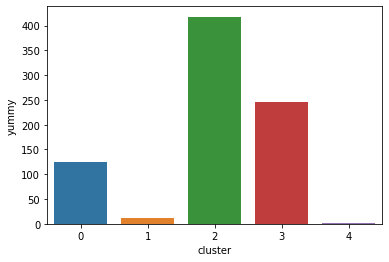

In [52]:
sns.barplot(x='cluster',y='yummy',data=sum_df)

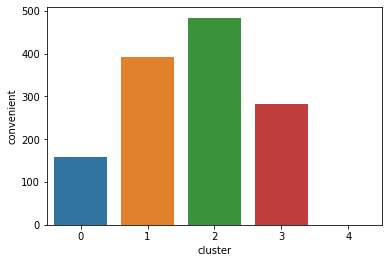

In [53]:
sns.barplot(x='cluster',y='convenient',data=sum_df)

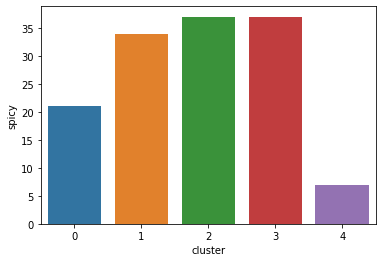

In [54]:
sns.barplot(x='cluster',y='spicy',data=sum_df)

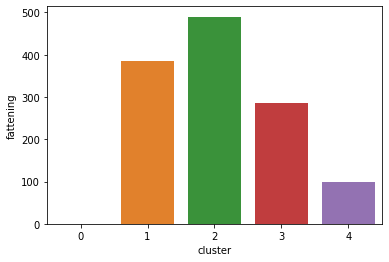

In [55]:
sns.barplot(x='cluster',y='fattening',data=sum_df)

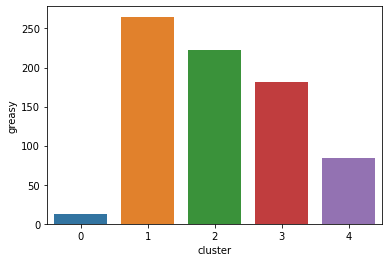

In [56]:
sns.barplot(x='cluster',y='greasy',data=sum_df)

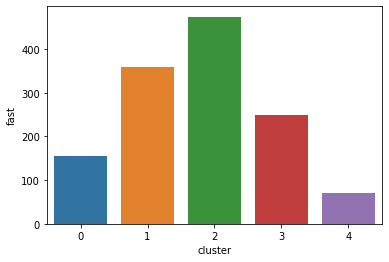

In [57]:
sns.barplot(x='cluster',y='fast',data=sum_df)

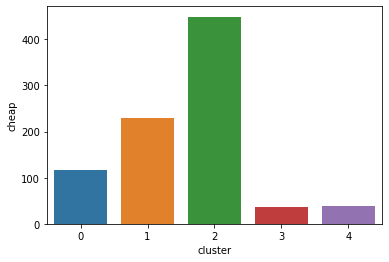

In [58]:
sns.barplot(x='cluster',y='cheap',data=sum_df)

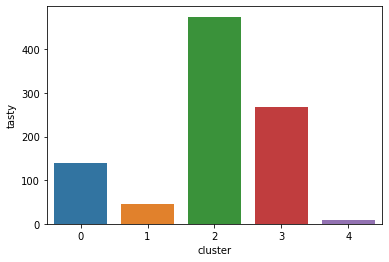

In [59]:
sns.barplot(x='cluster',y='tasty',data=sum_df)

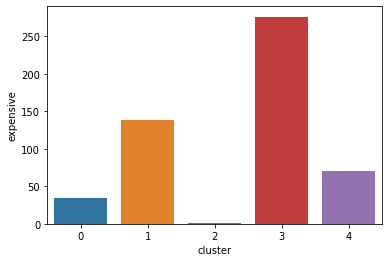

In [60]:
sns.barplot(x='cluster',y='expensive',data=sum_df)

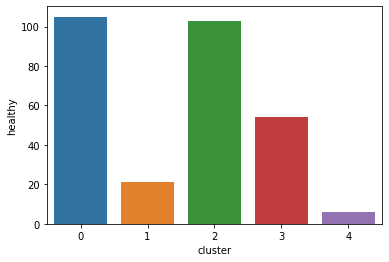

In [61]:
sns.barplot(x='cluster',y='healthy',data=sum_df)

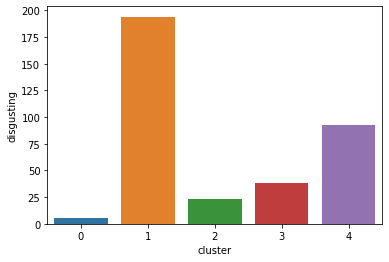

In [62]:
sns.barplot(x='cluster',y='disgusting',data=sum_df)